<a href="https://colab.research.google.com/github/nandhakumar-v-19/Skin-Disorder-Detection/blob/main/Skin_Disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load Dataset & Inspect CSV Files
import pandas as pd
df = pd.read_csv("/content/dataset_35_dermatology (1).csv")

In [2]:
print(df.head())

   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1         

In [3]:
print(df.shape)

(366, 35)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [5]:
print(df.describe())

         erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.00000

In [6]:
display(df.isnull().sum())

,0
erythema,0
scaling,0
definite_borders,0
itching,0
koebner_phenomenon,0
polygonal_papules,0
follicular_papules,0
oral_mucosal_involvement,0
knee_and_elbow_involvement,0
scalp_involvement,0


In [7]:
print("Class distribution:")
print(df['class'].value_counts())


Class distribution:
class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


In [8]:
# For numeric columns → Fill missing values with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [9]:
# For categorical columns → Fill missing values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [10]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# If target column is categorical – example "target"
# change "target" to your dataset target name
if 'target' in df.columns:
    df['target'] = le.fit_transform(df['target'])

In [11]:
print("\nAfter preprocessing:")
print(df.head())


After preprocessing:
   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1               

In [12]:
# Step 1: Identify target and numeric columns

# Target column
target_col = 'class'

# Numeric columns (excluding target)
numeric_cols = [col for col in df.columns if df[col].dtype != 'object' and col != target_col]

print("Target Column:", target_col)
print("\nNumeric Columns ({}):".format(len(numeric_cols)))
numeric_cols


Target Column: class

Numeric Columns (34):


['erythema',
 'scaling',
 'definite_borders',
 'itching',
 'koebner_phenomenon',
 'polygonal_papules',
 'follicular_papules',
 'oral_mucosal_involvement',
 'knee_and_elbow_involvement',
 'scalp_involvement',
 'family_history',
 'melanin_incontinence',
 'eosinophils_in_the_infiltrate',
 'PNL_infiltrate',
 'fibrosis_of_the_papillary_dermis',
 'exocytosis',
 'acanthosis',
 'hyperkeratosis',
 'parakeratosis',
 'clubbing_of_the_rete_ridges',
 'elongation_of_the_rete_ridges',
 'thinning_of_the_suprapapillary_epidermis',
 'spongiform_pustule',
 'munro_microabcess',
 'focal_hypergranulosis',
 'disappearance_of_the_granular_layer',
 'vacuolisation_and_damage_of_basal_layer',
 'spongiosis',
 'saw-tooth_appearance_of_retes',
 'follicular_horn_plug',
 'perifollicular_parakeratosis',
 'inflammatory_monoluclear_inflitrate',
 'band-like_infiltrate',
 'Age']

/tmp/ipython-input-1920973074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[target_col], palette='viridis')


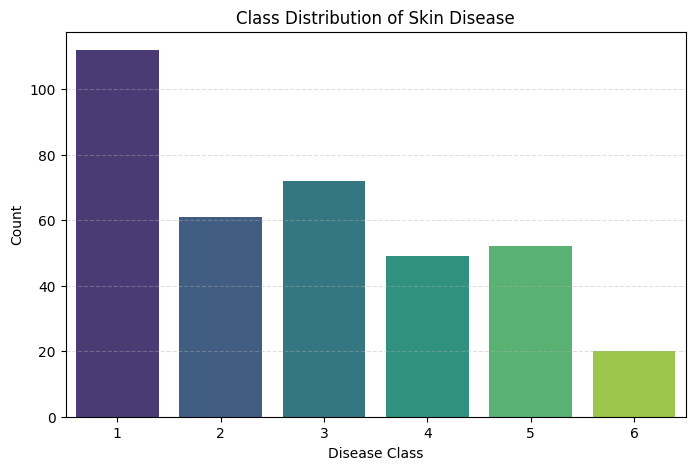

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x=df[target_col], palette='viridis')

plt.title('Class Distribution of Skin Disease')
plt.xlabel('Disease Class')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()


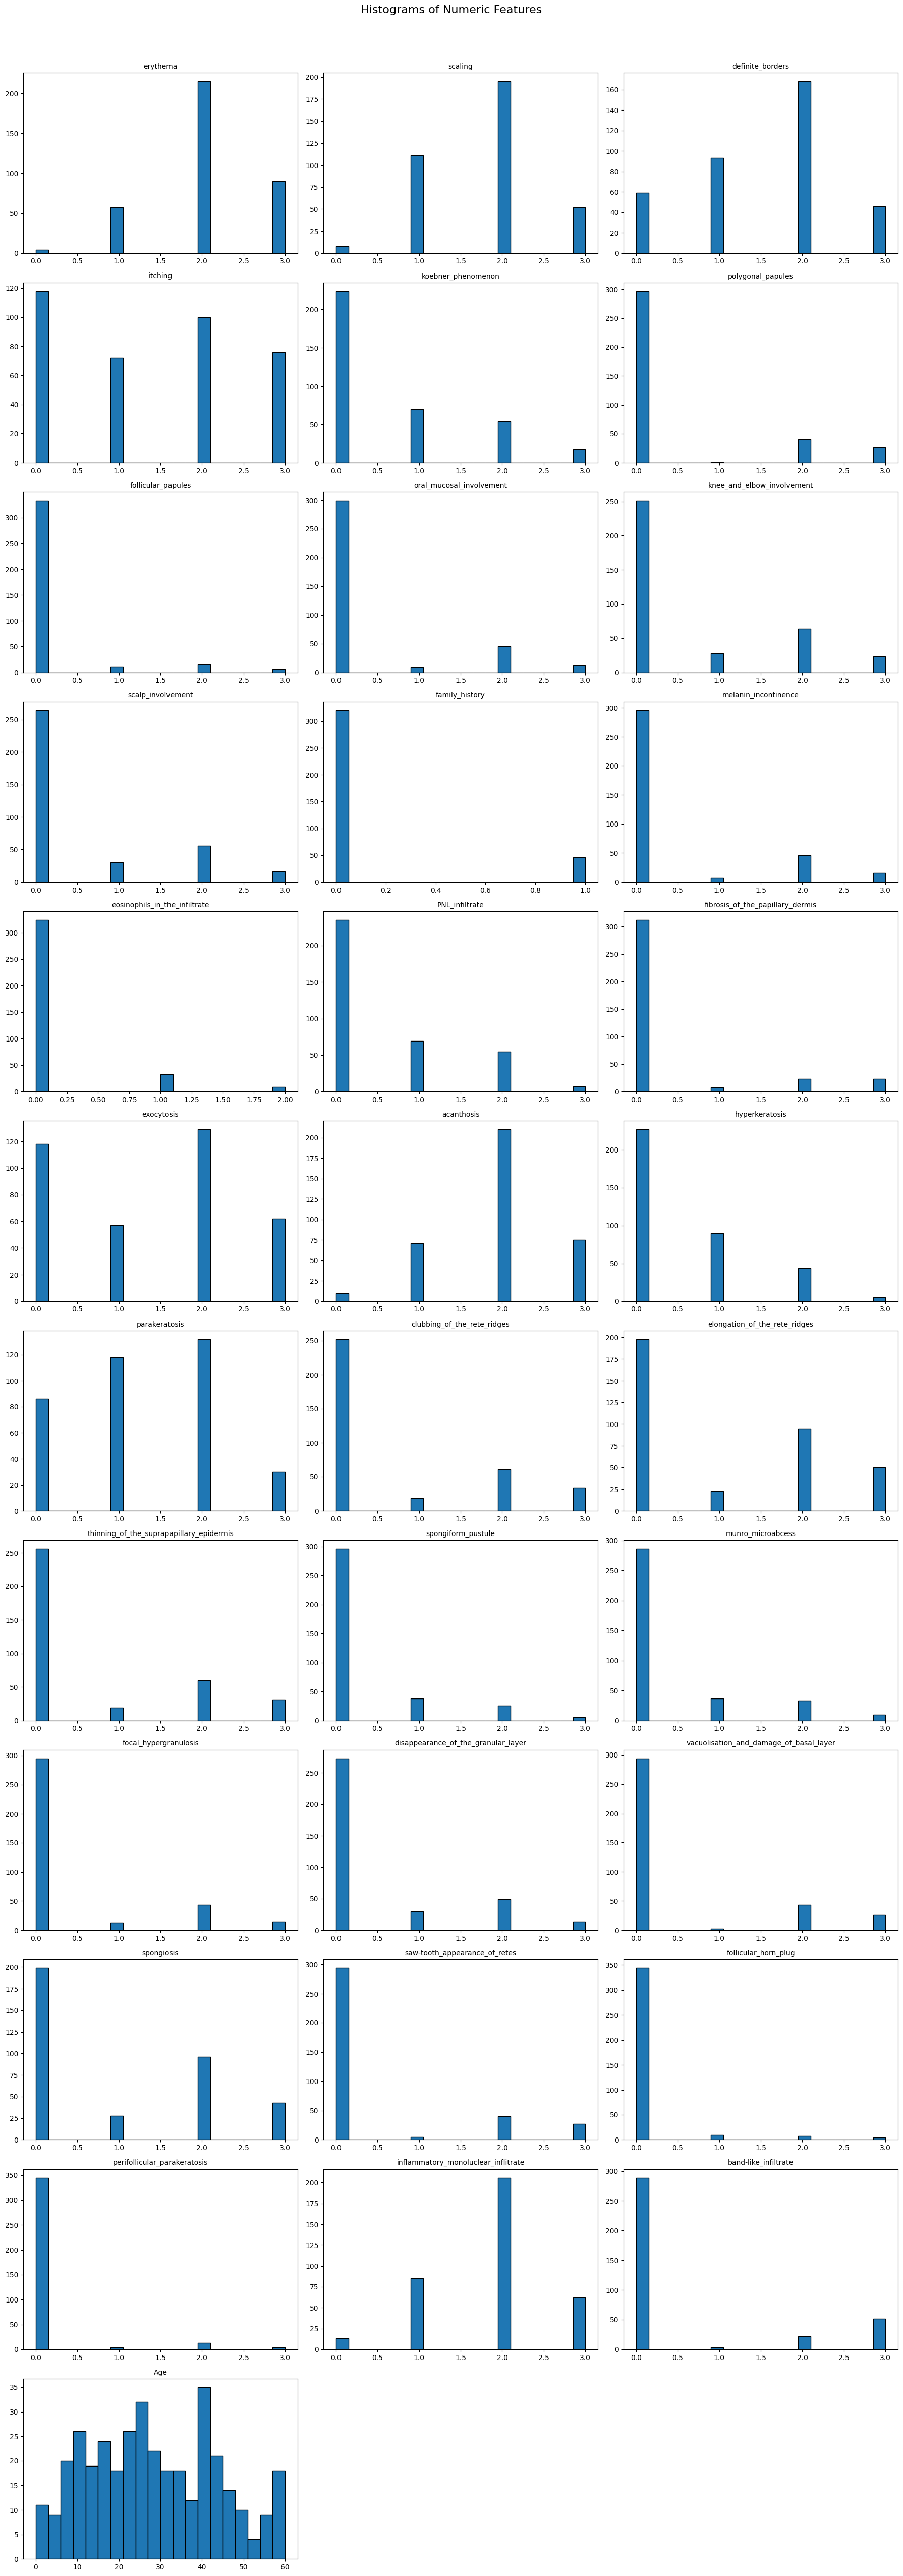

In [14]:
# Step 3: Histograms for all numeric columns

import matplotlib.pyplot as plt

num_cols = numeric_cols  # from Step 1

plt.figure(figsize=(18, 50))  # tall figure for multiple plots

for i, col in enumerate(num_cols, 1):
    plt.subplot(12, 3, i)  # 12 rows, 3 columns grid
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.suptitle("Histograms of Numeric Features", fontsize=16, y=1.02)
plt.show()
